Annual performance metrics:
          Annual Return  Annual Volatility
PETR4.SA       0.357644           0.432314
VALE3.SA       0.179795           0.367351
ITUB4.SA       0.123131           0.305412
ABEV3.SA       0.025185           0.283058


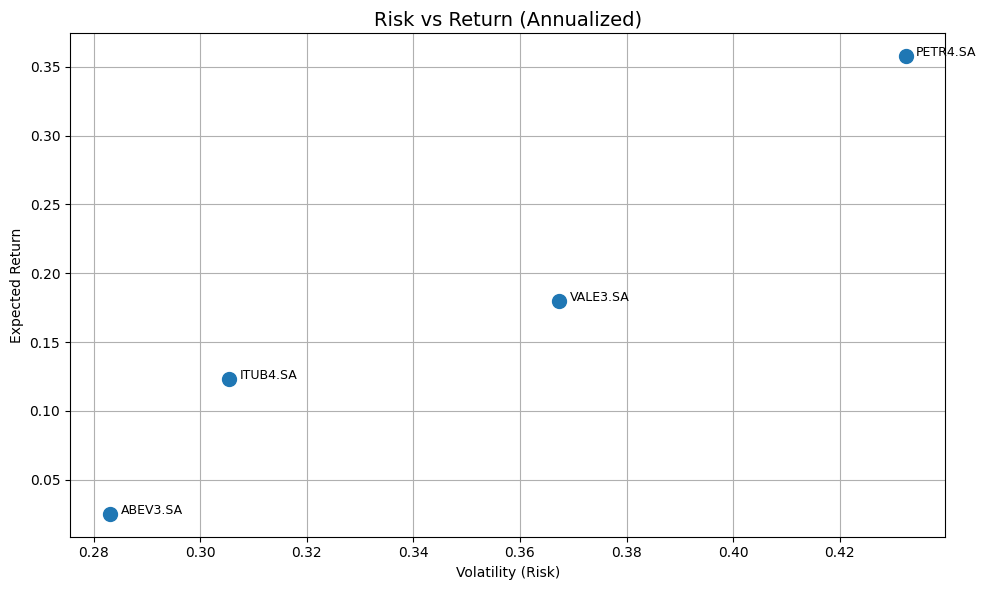

In [ ]:
# 02_returns_analysis.ipynb
# Author: André Lopes Marinho
# Description:
# This notebook analyzes stock returns and risk (volatility)
# based on historical price data.

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load cleaned price data
price_data = pd.read_csv('../data/stock_prices_brazil.csv', index_col='Date', parse_dates=True)

# Step 3 - Calculate daily returns
# Return = (Price_today - Price_yesterday) / Price_yesterday
# We use pct_change() to do this easily
daily_returns = price_data.pct_change().dropna()

# Step 4: Calculate annualized return and volatility
# Daily returns -> Annualized by multiplying mean by 252 (trading days in a year)
# Volatility = standard deviation of daily returns * sqrt(252)
annual_returns = daily_returns.mean() * 252
annual_volatility = daily_returns.std() * np.sqrt(252)

# Step 5: Combine into a summary DataFrame
metrics = pd.DataFrame({
    'Annual Return': annual_returns,
    'Annual Volatility': annual_volatility
}).sort_values('Annual Return', ascending=False)

print("Annual performance metrics:")
print(metrics)

# Step 6: Plot Risk vs Return
plt.figure(figsize=(10, 6))
plt.scatter(metrics['Annual Volatility'], metrics['Annual Return'], s=100)

for ticker in metrics.index:
    plt.text(
        metrics.loc[ticker, 'Annual Volatility'] + 0.002,
        metrics.loc[ticker, 'Annual Return'],
        ticker,
        fontsize=9
    )

plt.title('Risk vs Return (Annualized)', fontsize=14)
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.tight_layout()
plt.show()
